In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tqdm import tqdm_notebook as tqdm

/Users/yoshidayuuki/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/ipykernel/__main__.py:22: RuntimeWarning: divide by zero encountered in double_scalars
/Users/yoshidayuuki/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/ipykernel/__main__.py:22: RuntimeWarning: invalid value encountered in sqrt


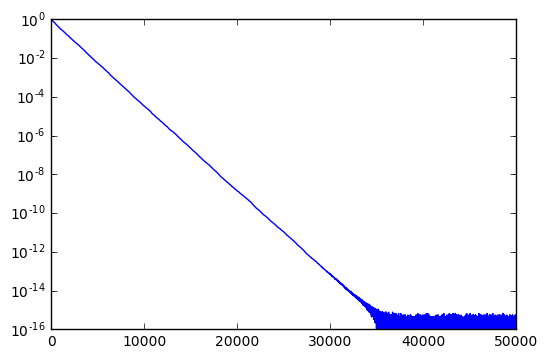

In [3]:
# 二層線形パーセプトロンの SGD 学習
N = 1000

J0, B0 = 1, 1
J = np.random.normal(0, J0/np.sqrt(N), N)
B = np.random.normal(0, B0/np.sqrt(N), N)

eta = 1.0
nb_iter = 50 * N

Qs, Rs, Ls, angles = np.zeros(0), np.zeros(0), np.zeros(0), np.zeros(0)
for t in tqdm(range(nb_iter)):
    xi = np.random.normal(0, 1, N)
    s = np.dot(xi, J)
    t = np.dot(xi, B)
    J += eta/N * (t - s) * xi
    Q, R, T = np.dot(J,J), np.dot(J,B), np.dot(B,B)
    Qs = np.r_[Qs, Q]
    Rs = np.r_[Rs, R]
    Ls = np.r_[Ls, Q/2 - R + T/2]
    
    angle = (2*T - 2*R) / 2/np.sqrt(T*(T-2*R+Q))
    angles = np.r_[angles, angle]
    
Ls_sgd = Ls
# plt.plot(np.arange(nb_iter), Qs)
# plt.plot(np.arange(nb_iter), Rs)
plt.plot(np.arange(nb_iter), Ls)
# plt.plot(np.arange(nb_iter), angles)
plt.yscale('log')
plt.show()

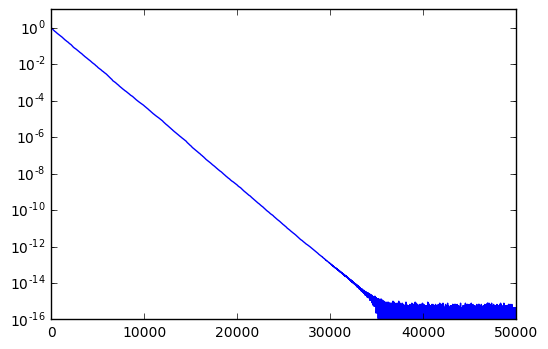

In [4]:
# 二層線形パーセプトロンの MomentumSGD 学習
N = 1000

J0, B0 = 1, 1
J = np.random.normal(0, J0/np.sqrt(N), N)
B = np.random.normal(0, B0/np.sqrt(N), N)
M = np.zeros(N)

eta = 0.1
gamma = 0.9
nb_iter = 50 * N
Qs, Rs, Ls = np.zeros(0), np.zeros(0), np.zeros(0)
As, Bs, Cs = np.zeros(0), np.zeros(0), np.zeros(0)
for it in tqdm(range(nb_iter)):
    xi = np.random.normal(0,1, N)
    s = np.dot(xi, J)
    t = np.dot(xi, B)
    
    J_new = J + eta/N * (t - s) * xi + gamma * M
    M = J_new - J
    J = J_new
    
    Q, R, T = np.dot(J,J), np.dot(J,B), np.dot(B,B)
    A, _B, C = np.dot(M,M), np.dot(M,J), np.dot(M,B)
    Qs = np.r_[Qs, Q]
    Rs = np.r_[Rs, R]
    As = np.r_[As, A]
    Bs = np.r_[Bs, _B]
    Cs = np.r_[Cs, C]
    Ls = np.r_[Ls, Q/2 - R + T/2]

Ls_mom = Ls    
    
# plt.plot(np.arange(nb_iter), Qs)
# plt.plot(np.arange(nb_iter), Rs)
plt.plot(np.arange(nb_iter), Ls)
# plt.plot(np.arange(nb_iter), As*N)
# plt.plot(np.arange(nb_iter), Bs*N)
# plt.plot(np.arange(nb_iter), Cs*N)
plt.yscale('log')
plt.show()

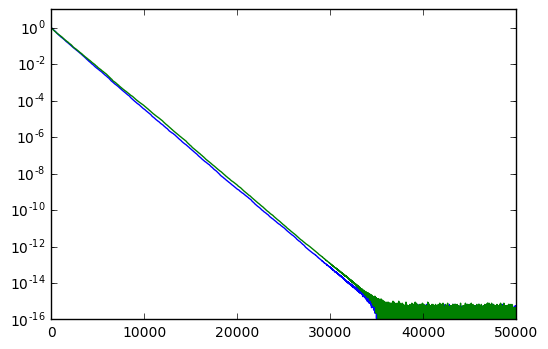

In [6]:
plt.plot(np.arange(nb_iter), Ls_sgd)
plt.plot(np.arange(nb_iter), Ls_mom)
plt.yscale('log')
plt.show()

In [ ]:
# ちなみに，何度か試行すると，この2つは少しばかりずれることもある．